___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
from xgboost import XGBClassifier  # önce hata verdi, sonra alttaki satırı çalıştırıp ayrıca install ettim. 

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [2]:
# from sklearnex import patch_sklearn
# patch_sklearn()

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_male = pd.read_csv('ANSUR II MALE Public.csv')

In [4]:
df_female = pd.read_csv('ANSUR II FEMALE Public.csv')

## Explore Data (EDA)

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [5]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [6]:
df_male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [7]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [8]:
df_female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [9]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)


In [10]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [11]:
df = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [12]:
df.shape

(6068, 108)

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [14]:
df.duplicated().sum()

0

In [15]:
df.select_dtypes("O")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,Ethnicity,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,NaN,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,NaN,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,NaN,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,NaN,Right hand
...,...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Mexican,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Mexican,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,NaN,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Mexican,Right hand


In [16]:
df.isnull().sum().sort_values(ascending=False)

Ethnicity                         4647
subjectid                            0
radialestylionlength                 0
thighcircumference                   0
tenthribheight                       0
                                  ... 
earprotrusion                        0
earlength                            0
earbreadth                           0
crotchlengthposterioromphalion       0
WritingPreference                    0
Length: 108, dtype: int64

In [17]:
[col for col in df.columns if df[col].isnull().any()]

['Ethnicity']

In [18]:
df['Ethnicity'].isnull().sum()

4647

In [19]:
df.drop('Ethnicity', axis=1, inplace=True)

In [20]:
df.describe(include=['O'])

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
count,6068,6068,6068,6068,6068,6068,6068,6068
unique,2,253,12,3,3,285,152,3
top,Male,27-Feb-12,Camp Shelby,Regular Army,Combat Service Support,11B,California,Right hand
freq,4082,45,1160,3140,3174,671,446,5350


In [21]:
print(df["DODRace"].value_counts())

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


In [22]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [23]:
df["DODRace"] = df.DODRace.map({
                                    1: "White",
                                    2: "Black",
                                    3: "Hispanic",
                                    4: "Asian",
                                    5: "Native American",
                                    6: "Pacific Islander",
                                    8: "Other"
                                  })

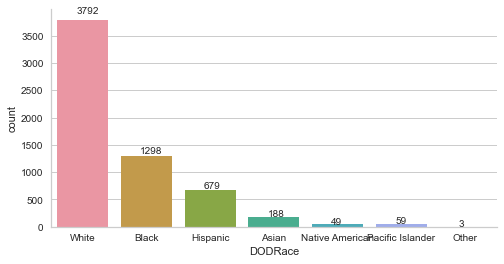

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['DODRace'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [25]:
df.Component.value_counts()

Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: Component, dtype: int64

In [26]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace         
Army National Guard  White               1855
                     Black                499
                     Hispanic             253
                     Asian                 60
                     Native American       24
                     Pacific Islander      17
Army Reserve         White                114
                     Black                 52
                     Hispanic              41
                     Asian                  9
                     Pacific Islander       3
                     Native American        1
Regular Army         White               1823
                     Black                747
                     Hispanic             385
                     Asian                119
                     Pacific Islander      39
                     Native American       24
                     Other                  3
Name: DODRace, dtype: int64

In [27]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

In [28]:
df.groupby(["Weightlbs"])["DODRace"].value_counts()

Weightlbs  DODRace 
0          Hispanic    1
86         White       1
88         White       1
90         Black       1
95         Black       1
                      ..
295        White       1
300        White       3
310        White       2
315        Hispanic    1
321        White       1
Name: DODRace, Length: 620, dtype: int64

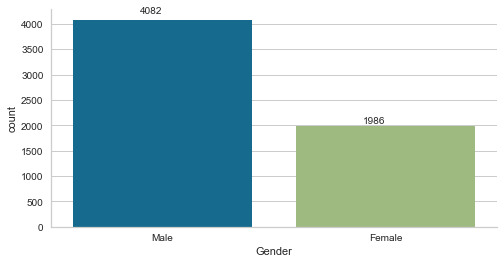

In [29]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Gender'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

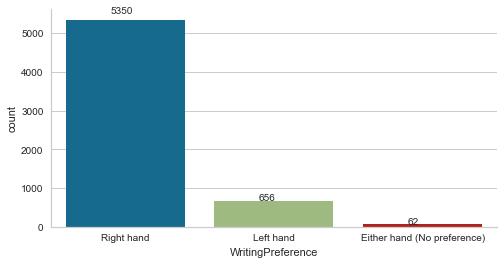

In [30]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['WritingPreference'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

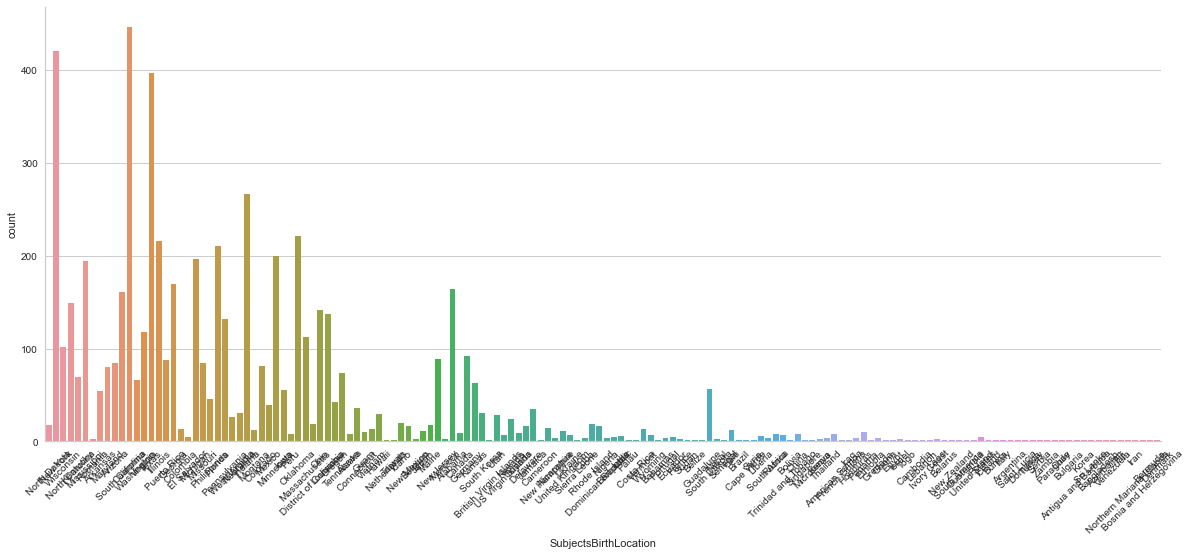

In [31]:
plt.figure(figsize=(20,8))
ax = sns.countplot(df['SubjectsBirthLocation'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
plt.xticks(rotation=45);

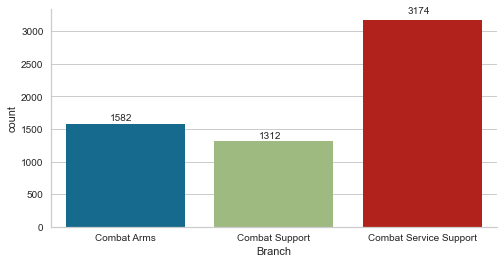

In [32]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df['Branch'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

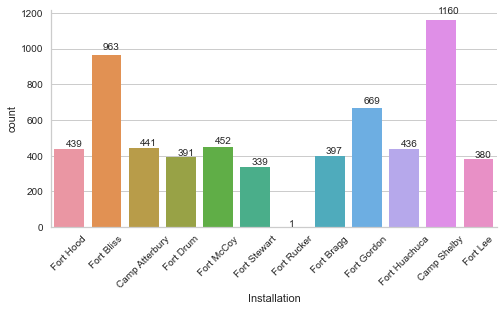

In [33]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Installation"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03))
    plt.xticks(rotation=45);

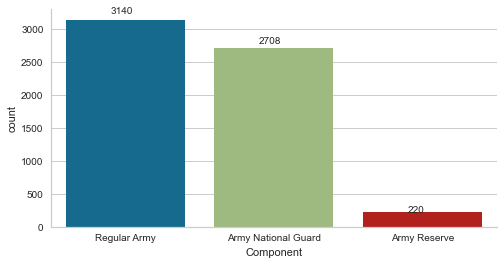

In [34]:
plt.figure(figsize=(8,4))
ax = sns.countplot(df["Component"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [35]:
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin",   
]

In [36]:
df.drop(drop_list1, axis=1, inplace=True)

In [37]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
62          8
64          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
423         2
451         2
431         2
318         2
2351        2
641         2
2518        2
631         1
238         1
358         1
425         1
4251        1
428         1
48          1
42351       1
Name: SubjectNumericRace, dtype: int64

In [38]:
df.drop("SubjectNumericRace",axis=1,inplace=True)

In [39]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [40]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
# 500 den aşağısını atacaktık

In [41]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,29501,285,1392,335,223,1297,252,196,368,299,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
6064,29502,262,1324,301,202,1204,236,181,378,294,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
6065,29503,260,1334,318,213,1259,234,183,363,332,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
6066,29511,205,1293,302,199,1207,213,163,376,276,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [42]:
df.reset_index(drop=True, inplace=True)

In [43]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,371,1054,726,167,815,Male,New York,White,35,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,29501,285,1392,335,223,1297,252,196,368,299,...,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
5765,29502,262,1324,301,202,1204,236,181,378,294,...,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
5766,29503,260,1334,318,213,1259,234,183,363,332,...,351,970,762,159,774,Female,Texas,Black,40,Right hand
5767,29511,205,1293,302,199,1207,213,163,376,276,...,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


<AxesSubplot:>

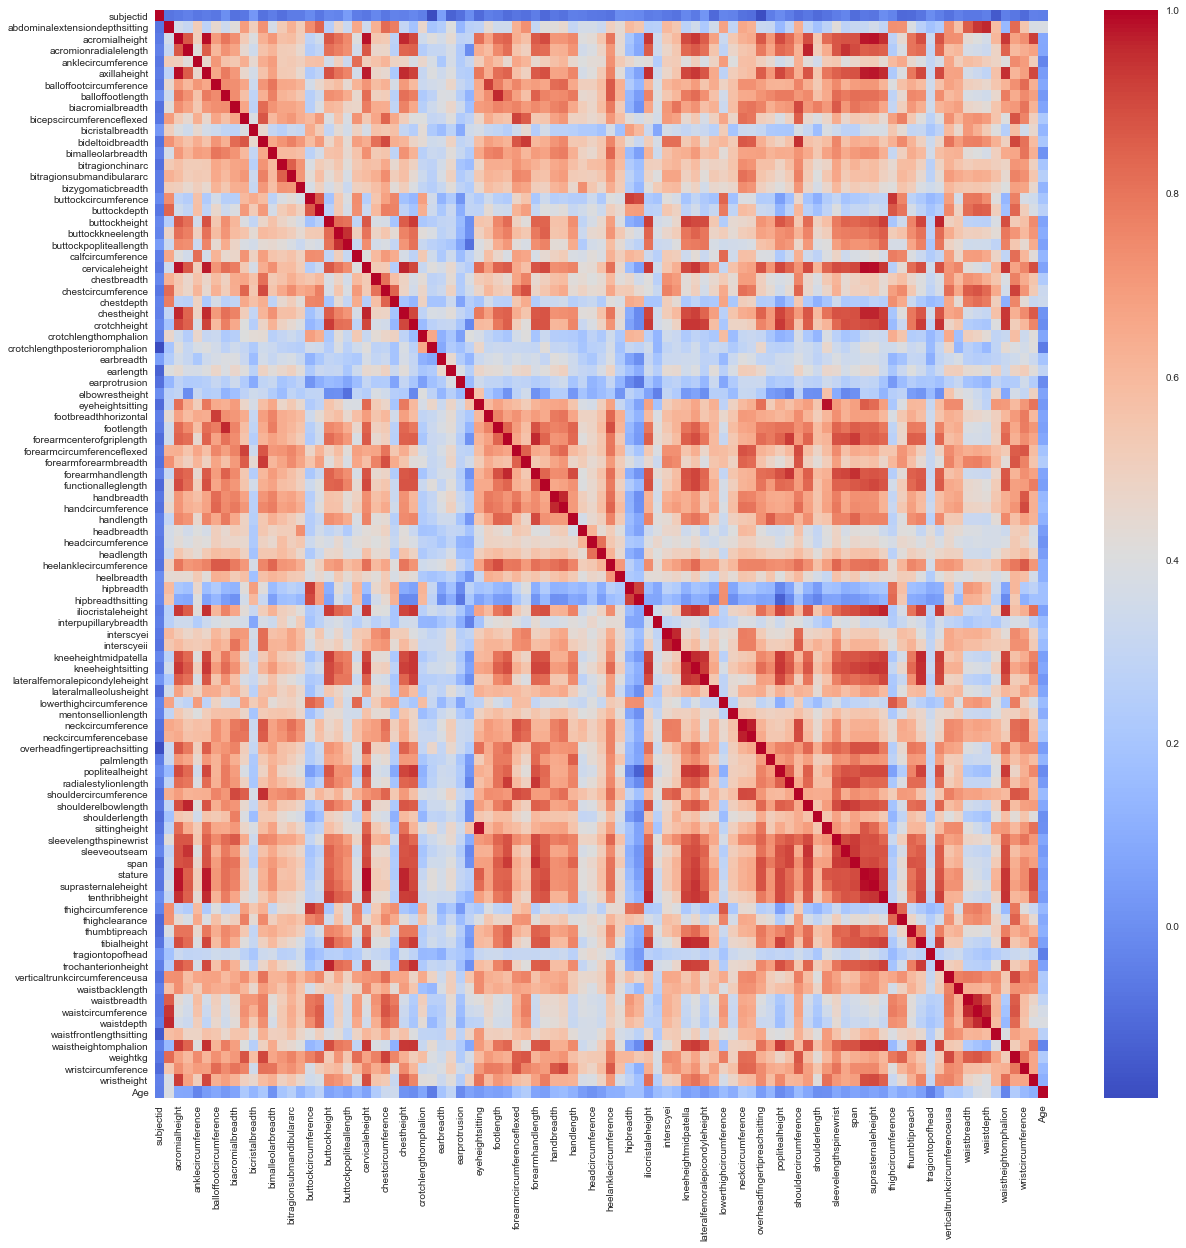

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm")

In [45]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)

In [46]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
...,...,...
281,weightkg,chestcircumference
282,weightkg,verticaltrunkcircumferenceusa
283,wristcircumference,handcircumference
284,wristheight,acromialheight


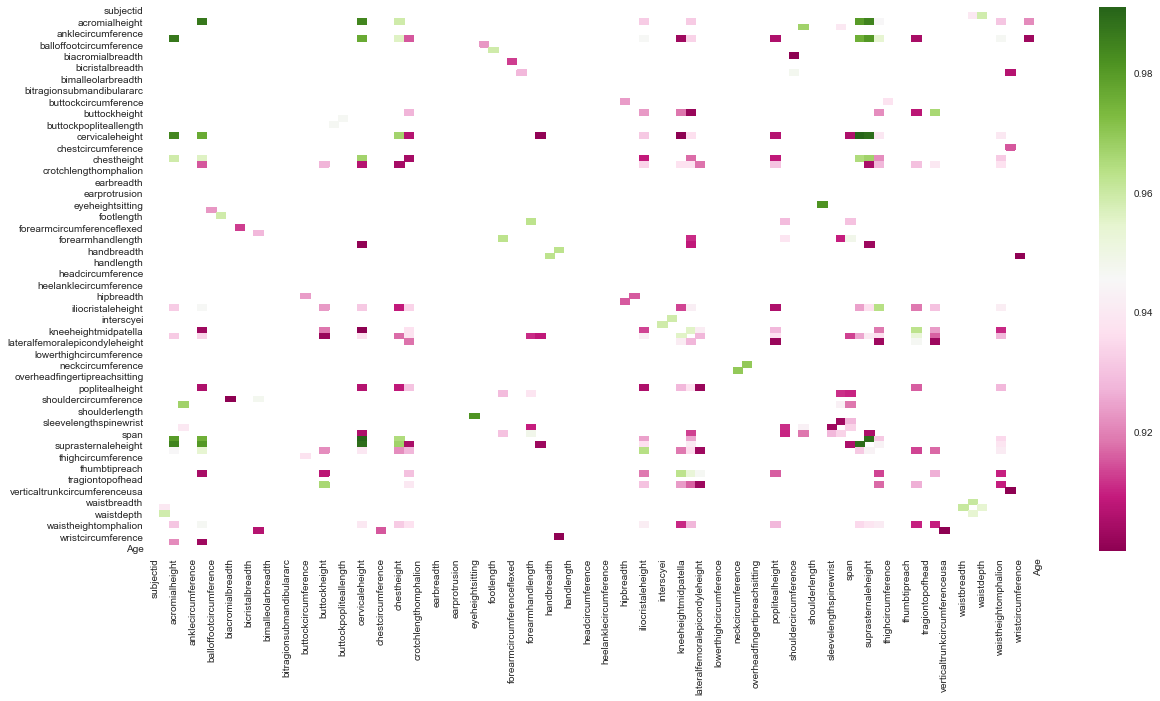

In [47]:
df_temp = df.corr()
filteredDf = df_temp[((df_temp >= .9) | (df_temp <= -.9)) & (df_temp !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf,cmap="PiYG")  #, annot=True
plt.show()

In [48]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates()

subjectid               subjectid                         1.000000
stature                 cervicaleheight                   0.991053
suprasternaleheight     stature                           0.989120
                        cervicaleheight                   0.989112
axillaheight            acromialheight                    0.987115
                                                            ...   
elbowrestheight         shoulderlength                    0.001873
                        lateralfemoralepicondyleheight    0.001434
buttockheight           elbowrestheight                   0.000728
balloffootlength        subjectid                         0.000510
lateralmalleolusheight  hipbreadthsitting                 0.000236
Length: 4466, dtype: float64

In [49]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

In [50]:
def outlier_function(df, col_name,k):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(k*IQR)
    lower_limit = first_quartile-(k*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [52]:
# loop through all columns to see if there are any outliers
k=1.5
print("\tNumber of Outliers for {}*IQR\n".format(k))
total=0
for col in df.select_dtypes("number"):
    if outlier_function(df.select_dtypes("number"), col,k)[2] > 0:
        outliers=outlier_function(df.select_dtypes("number"), col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n\t{} OUTLIERS TOTALLY".format(total))

	Number of Outliers for 1.5*IQR

1 outliers in 'subjectid'
46 outliers in 'abdominalextensiondepthsitting'
14 outliers in 'acromialheight'
31 outliers in 'acromionradialelength'
73 outliers in 'anklecircumference'
27 outliers in 'axillaheight'
23 outliers in 'balloffootcircumference'
11 outliers in 'balloffootlength'
1 outliers in 'biacromialbreadth'
19 outliers in 'bicepscircumferenceflexed'
57 outliers in 'bicristalbreadth'
12 outliers in 'bideltoidbreadth'
6 outliers in 'bimalleolarbreadth'
46 outliers in 'bitragionchinarc'
16 outliers in 'bitragionsubmandibulararc'
6 outliers in 'bizygomaticbreadth'
58 outliers in 'buttockcircumference'
47 outliers in 'buttockdepth'
42 outliers in 'buttockheight'
27 outliers in 'buttockkneelength'
25 outliers in 'buttockpopliteallength'
53 outliers in 'calfcircumference'
10 outliers in 'cervicaleheight'
29 outliers in 'chestbreadth'
15 outliers in 'chestcircumference'
29 outliers in 'chestdepth'
11 outliers in 'chestheight'
19 outliers in 'crotchhe

<AxesSubplot:xlabel='wristheight'>

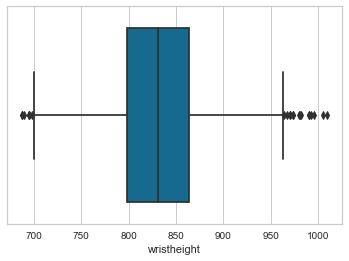

In [53]:
sns.boxplot(df["wristheight"])

In [54]:
k=3
for i in df.select_dtypes("number"):
    lower,upper,outliers=outlier_function(df.select_dtypes("number"),i,k)
    df=df[(df.select_dtypes("number")[i]>lower)&(df.select_dtypes("number")[i]<upper)]

In [55]:
df.shape

(5763, 99)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 5767
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       5763 non-null   int64 
 1   abdominalextensiondepthsitting  5763 non-null   int64 
 2   acromialheight                  5763 non-null   int64 
 3   acromionradialelength           5763 non-null   int64 
 4   anklecircumference              5763 non-null   int64 
 5   axillaheight                    5763 non-null   int64 
 6   balloffootcircumference         5763 non-null   int64 
 7   balloffootlength                5763 non-null   int64 
 8   biacromialbreadth               5763 non-null   int64 
 9   bicepscircumferenceflexed       5763 non-null   int64 
 10  bicristalbreadth                5763 non-null   int64 
 11  bideltoidbreadth                5763 non-null   int64 
 12  bimalleolarbreadth              5763 non-null   

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X=pd.get_dummies(df.drop(columns=['DODRace']))
y = df['DODRace']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (4610, 236)
Train target shape   :  (4610,)
Test features shape  :  (1153, 236)
Test target shape    :  (1153,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
pipe_log_model = Pipeline(steps=operations)


In [71]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [72]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[248  12   8]
 [  4 109  16]
 [ 20  80 656]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92       268
    Hispanic       0.54      0.84      0.66       129
       White       0.96      0.87      0.91       756

    accuracy                           0.88      1153
   macro avg       0.81      0.88      0.83      1153
weighted avg       0.91      0.88      0.89      1153


Train_Set
[[ 963   37   27]
 [  19  461   69]
 [  66  371 2597]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1027
    Hispanic       0.53      0.84      0.65       549
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4610
   macro avg       0.80      0.88      0.83      4610
weighted avg       0.90      0.87      0.88      4610



In [73]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [74]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

In [75]:
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.594207
test_precision_Hispanic    0.485444
test_recall_Hispanic       0.768721
dtype: float64

### Logistic Model GridsearchCV

In [76]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [77]:
param_grid = {
    "log__C": [0.1, 0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [78]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [79]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [80]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [81]:
log_model_grid.best_score_

0.7651376146788991

In [82]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[244  13  11]
 [  4 109  16]
 [ 23  83 650]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       268
    Hispanic       0.53      0.84      0.65       129
       White       0.96      0.86      0.91       756

    accuracy                           0.87      1153
   macro avg       0.80      0.87      0.82      1153
weighted avg       0.90      0.87      0.88      1153


Train_Set
[[ 955   42   30]
 [  26  451   72]
 [  64  386 2584]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1027
    Hispanic       0.51      0.82      0.63       549
       White       0.96      0.85      0.90      3034

    accuracy                           0.87      4610
   macro avg       0.80      0.87      0.82      4610
weighted avg       0.90      0.87      0.88      4610



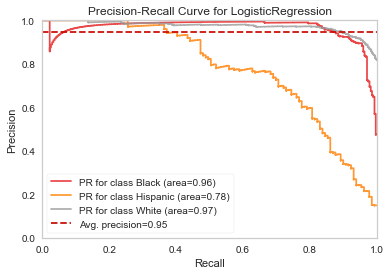

In [83]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [84]:
viz.score_    #["Hispanic"]

{'Black': 0.9649013000793981,
 'Hispanic': 0.776993481798336,
 'White': 0.9736188043735094,
 'micro': 0.9453020657225636}

In [85]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [86]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [87]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[242  12  14]
 [  4 109  16]
 [ 18  99 639]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       268
    Hispanic       0.50      0.84      0.62       129
       White       0.96      0.85      0.90       756

    accuracy                           0.86      1153
   macro avg       0.79      0.86      0.81      1153
weighted avg       0.89      0.86      0.87      1153


Train_Set
[[ 944   41   42]
 [  23  452   74]
 [  51  411 2572]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1027
    Hispanic       0.50      0.82      0.62       549
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4610
   macro avg       0.79      0.86      0.81      4610
weighted avg       0.90      0.86      0.87      4610



In [88]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.555484
test_precision_Hispanic    0.444080
test_recall_Hispanic       0.743266
dtype: float64

###  SVC Model GridsearchCV

In [89]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [90]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [91]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [92]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [93]:
svm_model_grid.best_score_

0.7615012510425354

In [94]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[245  12  11]
 [  5 109  15]
 [ 21  87 648]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.91       268
    Hispanic       0.52      0.84      0.65       129
       White       0.96      0.86      0.91       756

    accuracy                           0.87      1153
   macro avg       0.80      0.87      0.82      1153
weighted avg       0.90      0.87      0.88      1153


Train_Set
[[ 959   35   33]
 [  16  468   65]
 [  51  366 2617]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1027
    Hispanic       0.54      0.85      0.66       549
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4610
   macro avg       0.81      0.88      0.83      4610
weighted avg       0.91      0.88      0.89      4610



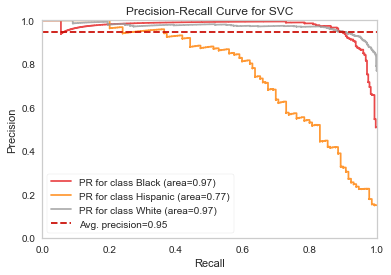

In [95]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [96]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [101]:
from sklearn.preprocessing import OrdinalEncoder

In [103]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [104]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [105]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,10032,233,1395,326,220,1293,245,193,394,338,...,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,10033,287,1430,341,230,1327,256,196,427,408,...,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,10092,234,1347,310,230,1239,262,199,401,359,...,205,399,968,794,176,793,1.0,133.0,31,2.0
4,10093,250,1585,372,247,1478,267,224,435,356,...,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [106]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [107]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4610, 98)
Train target shape   :  (4610,)
Test features shape  :  (1153, 98)
Test target shape    :  (1153,)


In [108]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)

In [109]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [110]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[186   0  73]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.90      0.72      0.80       259
    Hispanic       0.75      0.04      0.08       136
       White       0.79      0.98      0.88       758

    accuracy                           0.81      1153
   macro avg       0.82      0.58      0.59      1153
weighted avg       0.81      0.81      0.77      1153


Train_Set
[[1036    0    0]
 [   0  542    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1036
    Hispanic       1.00      1.00      1.00       542
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



In [111]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.062524
test_precision_Hispanic    0.726667
test_recall_Hispanic       0.033232
dtype: float64

### RF Model GridsearchCV

In [112]:
param_grid = {'n_estimators':[30,100,200],
             'criterion': ["gini","entropy"],
             'max_depth':[5,13,16],
             'min_samples_split':[2,6,10],
             }

In [118]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 13, 16],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [30, 100, 200]},
             scoring='accuracy', verbose=2)

In [120]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.062524
test_precision_Hispanic    0.726667
test_recall_Hispanic       0.033232
dtype: float64

In [121]:
rf_grid_model.best_score_

0.8177874186550976

In [122]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 100}

In [123]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[197   2  60]
 [ 13  10 113]
 [ 15   4 739]]
              precision    recall  f1-score   support

       Black       0.88      0.76      0.81       259
    Hispanic       0.62      0.07      0.13       136
       White       0.81      0.97      0.89       758

    accuracy                           0.82      1153
   macro avg       0.77      0.60      0.61      1153
weighted avg       0.80      0.82      0.78      1153


Train_Set
[[1036    0    0]
 [   0  542    0]
 [   0    0 3032]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1036
    Hispanic       1.00      1.00      1.00       542
       White       1.00      1.00      1.00      3032

    accuracy                           1.00      4610
   macro avg       1.00      1.00      1.00      4610
weighted avg       1.00      1.00      1.00      4610



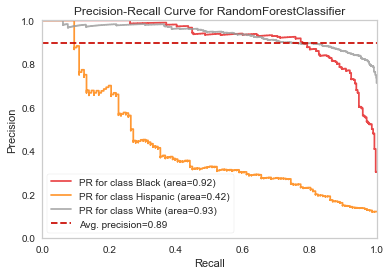

In [124]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

In [ ]:
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

In [ ]:
print("TEST REPORT")
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_classifier, X_test, y_test);

print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(classification_report(y_train, y_pred_train))
plot_confusion_matrix(xgb_classifier, X_train, y_train);

In [ ]:
visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

In [ ]:
rf_grid_model.best_score_

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___